In [2]:
import quantstats as qs
import yfinance as yf
import pandas as pd
import pandas_ta as ta
import numpy as np
import seaborn as sns
import utils as utl
import html_evaluation_portfolio as hep
import matplotlib.pyplot as plt
from IPython.display import display
from matplotlib.colors import LinearSegmentedColormap
from quantstats.stats import *
from quantstats._plotting.wrappers import distribution
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import df2img

## Importing and processing data

In [3]:
#set overall parameters (list opf securities and window of days on which you compute the volatility on)
dictionary_util =  {'Utilities instead commodities' : ['VTI', 'VGLT', 'VGIT', 'VPU', 'IAU'], 
                    'Utilities instead commodities x3 leverage' : ['UPRO', 'TMF', 'TYD', 'UTSL'],
                    'Utilities instead commodities x2 leverage' : ['SSO', 'UBT', 'UST', 'UPW', 'UGL']}
list_securities = ['UPRO', 'TMF', 'TYD', 'UTSL'] #DIG
window = 30 #days
title = 'Utilities instead commodities x3 leveverage'

In [4]:
unique_name = ''
for i in list_securities:
    unique_name += '_' + i
    
#main
data = hep.create_dataframe(list_securities) #I can import this dataframe but it is preatty fast.
#print(data)
data_perc = hep.perc_df(data)
inv_volat_data = hep.df_inverse_volatility(data_perc, window)
data_wheighted = hep.df_wheighted(inv_volat_data)
data_earnings = hep.df_earnings(data_wheighted, data_perc)
data_earn_eq_weight = hep.df_earnings_equal_weight(data_perc)
data_earnings.dropna(inplace = True)
data_earn_eq_weight.dropna(inplace = True)
display(data_earn_eq_weight)
data_earnings = data_earnings[-1834:] #1834 len of the no leverage portfolio

,UPRO,TMF,TYD,UTSL,Tot
Date,,,,,
2017-05-04,0.000479,-0.003610,-0.002165,-0.001507,-0.006803
2017-05-05,0.003146,0.000262,0.000345,0.006346,0.010099
2017-05-08,-0.000149,-0.003790,-0.001607,-0.000384,-0.005930
2017-05-09,-0.000671,-0.000265,-0.002022,-0.003346,-0.006305
2017-05-10,0.001147,-0.000797,0.002854,0.000000,0.003204
...,...,...,...,...,...
2022-04-04,0.006593,-0.004446,-0.001073,-0.005445,-0.004371
2022-04-05,-0.009275,-0.016684,-0.008621,0.004354,-0.030225
2022-04-06,-0.007619,-0.006236,-0.002542,0.015493,-0.000904


## Create and export plot for the report

#### Table of returns:

In [5]:
#param
figsize=(10, 5.5)
fontname = 'Arial'
annot_size=10
square = False
cbar = False
cmap = LinearSegmentedColormap.from_list('RedGreen', ['crimson', 'gold', 'lime'])
eoy = False
compounded = True

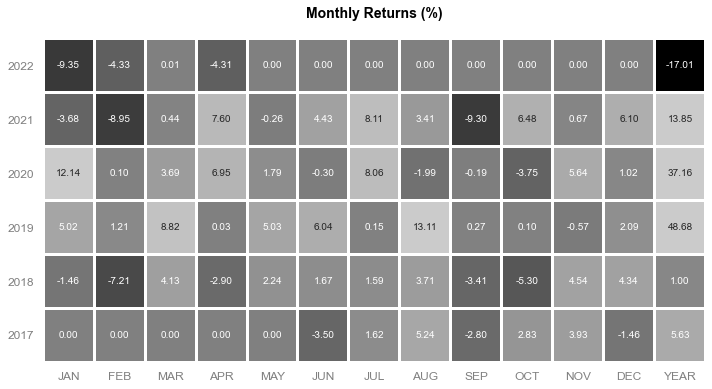

In [34]:
#crate the returns table plus the return over the year

fig, ax = plt.subplots(figsize=figsize)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

fig.set_facecolor('white')
ax.set_facecolor('white')

ax.set_title('Monthly Returns (%)\n', fontsize=14, y=.995,
             fontname=fontname, fontweight='bold', color='black')

returns = monthly_returns(data_earnings['Tot'], eoy=eoy,compounded=compounded) * 100

#print(returns.div(100).add(1).cumprod(axis = 1)) #replace(0,1).cumprod(axis=1)['DEC']
returns['YEAR'] = returns.div(100).add(1).cumprod(axis = 1)['DEC']
returns['YEAR'] = returns['YEAR'].sub(1).mul(100)
#yearly_returns = returns.div(100).add(1).cumprod(axis=1)['DEC'] - 1
#returns['YEAR'] = yearly_returns *100
#returns

reversed_df = returns.iloc[::-1]

#display(returns)

ax = sns.heatmap(reversed_df, ax=ax, annot=True, center=0,
                annot_kws={"size": annot_size}, vmax = 10,
                fmt="0.2f", linewidths=2,
                square=square, cbar=cbar, cmap = 'gray',
                cbar_kws={'format': '%.0f%%'})

ax.tick_params(colors="#808080")
plt.xticks(rotation=0, fontsize=annot_size*1.2)
plt.yticks(rotation=0, fontsize=annot_size*1.2)
plt.subplots_adjust(hspace=0, bottom=0, top=1)
fig.tight_layout(w_pad=0, h_pad=0)
plt.savefig('./img/temp/table_montly_returns' + unique_name + '.png')
fig_table = fig 

In [32]:
#returns.drop(columns = ['YEAR'], inplace=True)
print(returns.div(100).add(1).cumprod(axis=1))
yearly_returns = returns.div(100).add(1).cumprod(axis=1)['DEC'] - 1
returns['YEAR'] = yearly_returns *100
returns

           JAN       FEB       MAR       APR       MAY       JUN       JUL  \
2017  1.000000  1.000000  1.000000  1.000000  1.000000  0.965041  0.980676   
2018  0.985408  0.914362  0.952147  0.924492  0.945164  0.960963  0.976201   
2019  1.050153  1.062816  1.156579  1.156913  1.215110  1.288453  1.290364   
2020  1.121416  1.122542  1.163908  1.244778  1.267029  1.263279  1.365049   
2021  0.963219  0.876998  0.880830  0.947780  0.945327  0.987200  1.067298   
2022  0.906475  0.867251  0.867317  0.829923  0.829923  0.829923  0.829923   

           AUG       SEP       OCT       NOV       DEC      YEAR  
2017  1.032026  1.003112  1.031461  1.071969  1.056326  1.115825  
2018  1.012372  0.977817  0.925974  0.967974  1.010019  1.020138  
2019  1.459525  1.463414  1.464840  1.456445  1.486842  2.210700  
2020  1.337846  1.335273  1.285243  1.357760  1.371572  1.881209  
2021  1.103677  1.001052  1.065929  1.073019  1.138499  1.296181  
2022  0.829923  0.829923  0.829923  0.829923  0.829

,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,YEAR
2017,0.000000,0.000000,0.000000,0.000000,0.000000,-3.495919,1.620132,5.236166,-2.801648,2.826079,3.927262,-1.459225,5.632629
2018,-1.459180,-7.209802,4.132401,-2.904543,2.236040,1.671572,1.585666,3.705333,-3.413313,-5.301908,4.535850,4.343540,1.001880
2019,5.015268,1.205810,8.822141,0.028934,5.030341,6.035942,0.148295,13.109546,0.266499,0.097426,-0.573098,2.087082,48.684243
2020,12.141568,0.100476,3.685008,6.948102,1.787535,-0.295902,8.055968,-1.992831,-0.192265,-3.746838,5.642247,1.017265,37.157155
2021,-3.678052,-8.951430,0.437031,7.600783,-0.258875,4.429493,8.113642,3.408503,-9.298403,6.480873,0.665109,6.102457,13.849940
2022,-9.352470,-4.327160,0.007675,-4.311475,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-17.007693


#### Distribution plot:

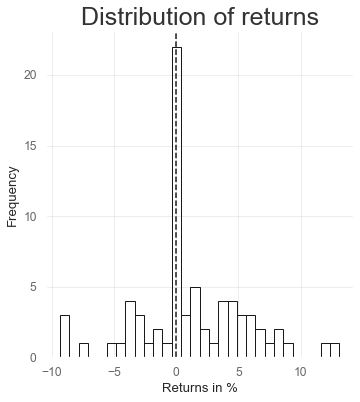

In [31]:
returns = monthly_returns(data_earnings['Tot'], eoy=eoy,compounded=compounded) * 100

series = pd.Series(dtype = 'float64')
for column in returns.columns:
    series = pd.concat([series,returns[column]])
#distribution(returns)
ax = series.plot.hist(bins = 30, edgecolor='k',fill=False)
ax.set_title('Distribution of returns', size = 25)
ax.axvline(0, color='k', linestyle='--')
ax.set_xlabel("Returns in %")
ax.set_ylabel("Frequency")
fig = ax.get_figure()
fig.set_size_inches(5.5,6)
fig.savefig('./img/temp/distribution_returns' + unique_name + '.png')
fig_distribution = fig

#### Table of statistics:

In [32]:
# create table of stats

statistics = pd.DataFrame(columns = ['index', 'value'])

statistics.loc[0] = ['Annualised return', utl.annualized_return(data_earnings['Tot'])]
statistics.loc[1] = ['Annualised volatility', utl.annualised_volatility(data_earnings['Tot'])]
statistics.loc[2] = ['Sharpe ratio', sharpe(data_earnings['Tot'])]
statistics.loc[3] = ['Sortino ratio', sortino(data_earnings['Tot'])]
statistics.loc[4] = ['Adjusted sortino', adjusted_sortino(data_earnings['Tot'])] 
statistics.loc[5] = ['Skew', skew(data_earnings['Tot'])] 
statistics.loc[6] = ['Kurtosis', data_earnings['Tot'].kurt()] 
statistics.loc[7] = ['Max drawdown', max_drawdown(data_earnings['Tot'])] 
statistics.loc[8] = ['GPR', gain_to_pain_ratio(data_earnings['Tot'])] 
statistics.loc[9] = ['Calmar ratio', calmar(data_earnings['Tot'])] 
statistics.loc[10] = ['Pay-off ratio', payoff_ratio(data_earnings['Tot'])] 

# Annualised return (At top)
# Annualizwed volatility (At top)

#export as .csv
statistics.to_csv('./data/temp/statistics_all_weather' + unique_name + '.csv')

statistics


,index,value
0,Annualised return,0.168570
1,Annualised volatility,0.181971
2,Sharpe ratio,0.926450
3,Sortino ratio,1.271805
4,Adjusted sortino,0.899302
5,Skew,-0.919417
6,Kurtosis,7.153116
7,Max drawdown,-0.246682
8,GPR,0.171596
9,Calmar ratio,0.664951


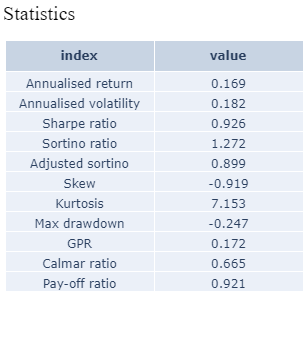

In [33]:
#transform pd. dataframe to image

fig = df2img.plot_dataframe(
    statistics.round(3),
    print_index=False,
    title=dict(
        font_color="black",
        font_family="Times New Roman",
        font_size=20,
        text="Statistics"),
    fig_size=(308, 338),

   )

df2img.save_dataframe(fig=fig, filename='./img/temp/statistics_all_weather' + unique_name + '.png')

fig_stats = fig
#statistics.to_csv('./img/temp/statistics_all_weather' + unique_name + '.csv')


#### Drawdown and underwater plots:

In [9]:
# Create benchmark portfolio (classic 60/40)

benchmark_portf = hep.create_dataframe(['TIP', 'SSO'])
benchmark_portf.dropna(inplace = True)
benchmark_portf_perc = hep.perc_df(benchmark_portf)
benchmark_portf_weight = pd.DataFrame()
benchmark_portf_weight['TIP'] = benchmark_portf_perc['TIP'] * 0.4
benchmark_portf_weight['SSO'] = benchmark_portf_perc['SSO'] * 0.6
#benchmark_portf_weight['TOT'] = benchmark_portf_weight.sum(axis=1)
#benchmark_portf_weight.dropna(inplace = True)
benchmark_earnings = hep.df_earnings(benchmark_portf_weight, benchmark_portf_perc)
benchmark_portf_perc['Tot'] = benchmark_portf_perc.sum(axis=1)
benchmark_portf_perc.dropna(inplace = True)
benchmark_portf_perc = benchmark_portf_perc[-len(data_earnings):] #as big as the all weather one

In [34]:
# Param
grayscale=True 
figsize= (10, 5.5)
fontname='Arial' 
lw=1
log_scale=False
match_volatility=False
compound=False
ylabel="Drawdown"
resample=None 
subtitle=True 
savefig =  './img/temp/under_water_plot' + unique_name + '.png'
show=True

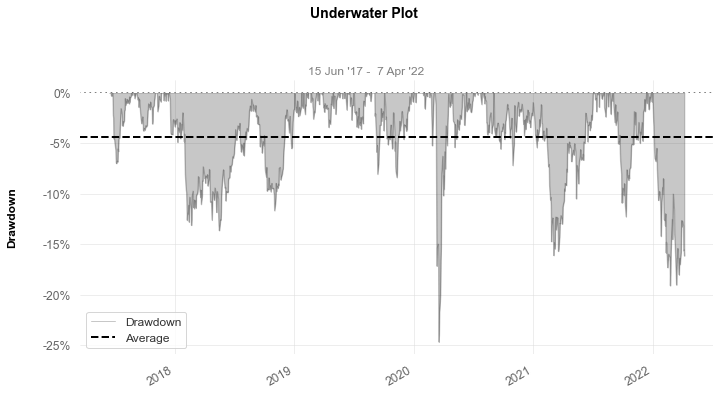

In [35]:
from quantstats._plotting.core import plot_timeseries

dd = to_drawdown_series(data_earnings['Tot'])
#bench_dd = to_drawdown_series(benchmark_portf_perc['TOT'])

fig = plot_timeseries(dd, title='Underwater Plot',
                            hline=dd.mean(), hlw=2, hllabel="Average",
                            returns_label="Drawdown",
                            compound=compound, match_volatility=match_volatility,
                            log_scale=log_scale, resample=resample,
                            fill=True, lw=lw, figsize=figsize,
                            ylabel=ylabel,
                            fontname=fontname, grayscale=grayscale,
                            subtitle=subtitle,
                            savefig=savefig, show=show)
fig

## Combine the plots and create a figure

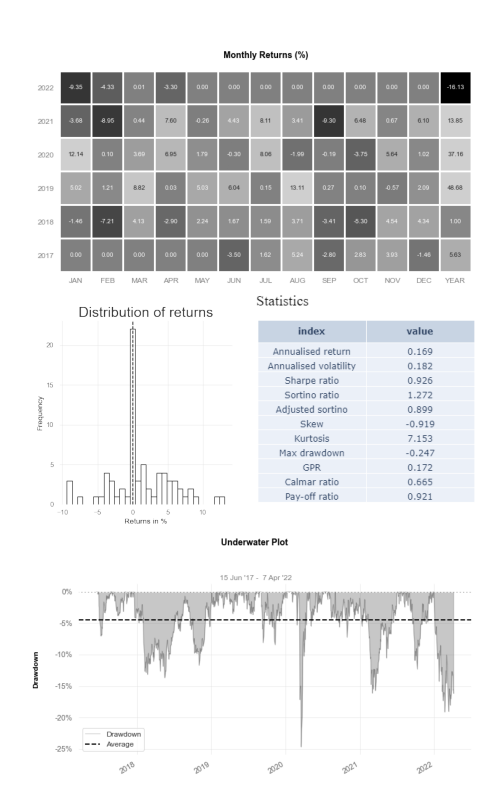

In [38]:
fig = plt.figure(figsize=(8, 13.55))

gs = gridspec.GridSpec(3, 2, wspace=0.0, hspace=0.0)
ax1 = plt.subplot(gs[0, :])
fig_table = plt.imread('./img/temp/table_montly_returns' + unique_name + '.png')
ax1.imshow(fig_table)
ax1.set_aspect('equal')
ax1.set_xticklabels([])
ax1.set_yticklabels([])
ax1.grid(False)

ax2 = plt.subplot(gs[1,:1])
fig_distribiution = plt.imread('./img/temp/distribution_returns' + unique_name + '.png')
ax2.imshow(fig_distribiution)
ax2.set_aspect('equal')
ax2.set_xticklabels([])
ax2.set_yticklabels([])
ax2.grid(False)

ax3 = plt.subplot(gs[1, 1:])
fig_stats = plt.imread('./img/temp/statistics_all_weather' + unique_name + '.png')
ax3.imshow(fig_stats)
ax3.set_aspect('equal')
ax3.set_xticklabels([])
ax3.set_yticklabels([])
ax3.grid(False)
    
ax4 = plt.subplot(gs[-1,:])
fig_underwater = plt.imread('./img/temp/under_water_plot' + unique_name + '.png')
ax4.imshow(fig_underwater)
ax4.set_aspect('equal')
ax4.set_xticklabels([])
ax4.set_yticklabels([])
ax4.grid(False)

fig.suptitle(title, fontsize=25, y = 0.92, color = 'w') #add the correct leverage

plt.savefig('reports/report' + unique_name + '.png', dpi = 1200)